# Project: Investigate No-show appointments - Dataset

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## questions to ask:
 
 1- Is SMS_recieved associated with no_show?
 
 2- What period is covered by this dataset (survey) and does the time between scheldule day and appointment day affect the patient's no-show ?
 
 3-  What is the percentage that patients no-show for there appointmen?
 
 4-  Is age associated with patient  no-show?

In [21]:
#  import packages to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Data Wrangling

In [22]:
# Load data and print out a few lines.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### investigate the dataset

In [23]:
df.shape

(110527, 14)

In [24]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [26]:
# see if there any duplicated rows
sum(df.duplicated())

0

In [27]:
# Age have a big standard div, see why:
df.groupby('Age').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,,,,,,,,,,,,,
-1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539
1,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
2,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
3,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513
4,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299
5,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489
6,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
7,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427


In [28]:
# show patient with age = -1
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [29]:
# show patients with age = 115
df.loc[df['Age'] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [30]:
# how many neighbourhood?
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [31]:
# is any patient booked many appointment?
df.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

In [32]:
# one patient make 88 appointment!! is he very sick or very undecided?
max_appoint = df.loc[df['PatientId'] == 822145925426128]
max_appoint['No-show'].value_counts()

No     87
Yes     1
Name: No-show, dtype: int64

he shown up at one appintment from all the 88!!

In [33]:
# the number of patients
df.PatientId.nunique()

62299

## Data Cleaning:
1- Rename 'No-show' header to 'no_show', then we can use it as dotted parameter. it's good to be unique style as our analyse key
>**note** the headers have some lowercase and some uppercase and this is good to see the first letter of every word

2- Convert 'ScheduledDay' type to datetime.

3- Convert 'AppointmentDay' type to datetime.

4- Drop 'Age' irrational value = -1 
>**Note** there is two females patients who is 115 years old one of them scheduled appointment 4 times with 3 no-show and that make sence, I goolged it and yes there is Age records at Brazil.

In [34]:
# Create a copy from the data before cleaning:
df_clean = df.copy()

In [35]:
# Rename 'No-show' header:
df_clean.rename(columns={'No-show': 'no_show'}, inplace=True)
# test
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'no_show'],
      dtype='object')

In [36]:
# Change 'ScheduledDay' and 'AppointmentDay' type to datetime:
df_clean['ScheduledDay']= pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay']= pd.to_datetime(df_clean['AppointmentDay'])
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [37]:
# Drop the row with Age [-1]
df_clean.drop(df_clean[df_clean['Age'] == -1].index, inplace = True)
# test
df_clean.loc[df_clean['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show


### Research Question 1 : Is SMS_recieved associated with no_show?


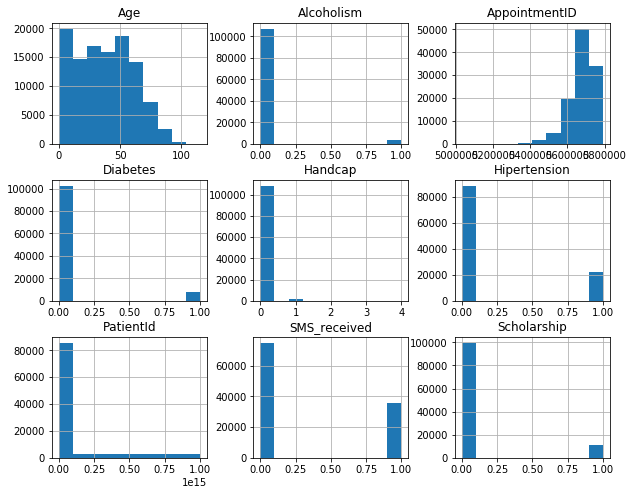

In [38]:
# hologram to all columns:
df_clean.hist(figsize=(10,8));

In [39]:
show = df_clean.no_show == "No"
not_shown = df_clean.no_show == "Yes"
df_clean.SMS_received[show].count()

88207

In [40]:
df_clean.SMS_received[not_shown].sum()

9784

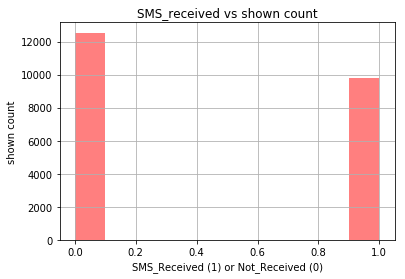

In [41]:
#df.SMS_received[show].hist(alpha=0.5, color='blue', label='shown')
df_clean.SMS_received[not_shown].hist(alpha=0.5, color='red', label='not_shown')
plt.legend
plt.xlabel('SMS_Received (1) or Not_Received (0)')
plt.ylabel('shown count')
plt.title('SMS_received vs shown count');

In [42]:
df_clean.groupby(['SMS_received', 'no_show']).size()

SMS_received  no_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
dtype: int64

We can see that from here the mojorty didn't received SMS and many of them (83.2% of them (calculated by calculator)) shown at appointment and 72.4% whom received SMS shown at the appointment, due to the big difference between The number of patients whom recevied SMS and whom not, if there any effect for SMS_received this is not effictive alot

### Research Question 2: What period is covered by this dataset (survey) and does the time between scheldule day and appointment day affect the patient's no-show ?

In [43]:
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'no_show'],
      dtype='object')

In [44]:
# time of the survey:
df_clean.AppointmentDay.max()-df_clean.AppointmentDay.min()

Timedelta('40 days 00:00:00')

In [45]:
# time of patient set up their appointment:
df_clean.ScheduledDay.max()-df_clean.ScheduledDay.min()

Timedelta('211 days 12:53:27')

In [46]:
# create new column with the time between make the appointment and the ScheduledDay (in days)
df_clean['diff_time']=(df_clean.AppointmentDay-df_clean.ScheduledDay).astype(int)/ 10**9/60/60/24

In [47]:
df_clean.diff_time.value_counts(bins=10)

(-6.7620000000000005, 11.937]    78182
(11.937, 30.45]                  22209
(30.45, 48.963]                   6825
(48.963, 67.476]                  2171
(67.476, 85.989]                   815
(85.989, 104.503]                  205
(160.042, 178.555]                  45
(104.503, 123.016]                  38
(141.529, 160.042]                  20
(123.016, 141.529]                  16
Name: diff_time, dtype: int64

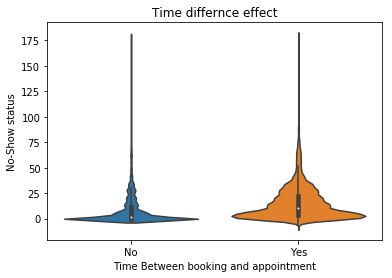

In [48]:
sns.violinplot(y ='diff_time',x ='no_show', data = df_clean, scale= "width")
plt.xlabel('Time Between booking and appointment')
plt.ylabel('No-Show status')
plt.title('Time differnce effect');

As we see, this records of 40 days only and patients scheduled these appointmenst in range of 211 days, this make the relation not directly
Also the patient show up to their medical appointment when the difference between AppointmentDay and ScheduledDay is low, while the patient don't show up when the difference is large, may be he forget the appointment

### Research Question 3: what is the percentage that patients no-show for there appointmen?

In [49]:
# total of appointments:
total_appointment = df_clean['AppointmentID'].count()
total_appointment

110526

In [50]:
#Total for show / no-show
total_no = df_clean.query('no_show == "Yes"')['AppointmentID'].count()
total_yes = df_clean.query('no_show == "No"')['AppointmentID'].count()
print(total_no, total_yes)

22319 88207


we can see that 22,319 patient missed the appointment and 88,207 didn't miss the appointment.

In [51]:
# because no_show yes and no are tricky
print('patient showd:', total_yes)
print('patient not shown:', total_no)

patient showd: 88207
patient not shown: 22319


In [52]:
prop_no = total_no/total_appointment
prop_yes = total_yes/total_appointment
print('percentage of no_show patients:', prop_no*100)
print('percentage of shown patients:', prop_yes*100)

percentage of no_show patients: 20.1934386479
percentage of shown patients: 79.8065613521


we can see that 79.81 % of patient are went to their medical appointments while 20.19 % of patient didn't show up.

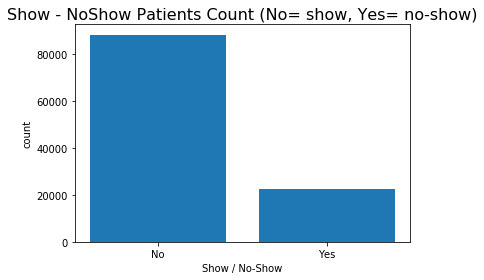

In [53]:
# plotting patient count by Noshow data.

plt.bar(df_clean.no_show.unique(), df_clean.no_show.value_counts())
plt.title("Show - NoShow Patients Count (No= show, Yes= no-show)", size='16')
plt.xlabel('Show / No-Show')
plt.ylabel('count');

### Research Question 4: Is age associated with patient  no-show?

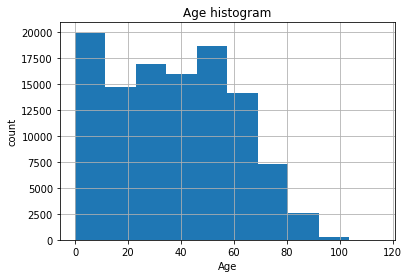

In [54]:
df_clean.Age.hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age histogram');

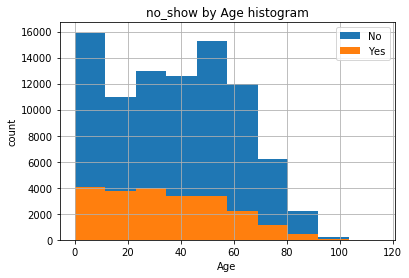

In [55]:
#plotting histogram of patients by no_show.
df_clean.groupby(['no_show']).Age.hist();
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(df_clean.no_show.unique())
plt.title('no_show by Age histogram');

we see that the ratio of no_show to total is not affected very much by Age, may be it decreases a bit when the age increases. Ratio also decreases noticeably at minimum age may be because newborns need more care.

## Conclusions
> This Dataset has a Lot to investigate, we can't make sure what are the most important features affecting the result of not showing up on the scheduled appointments, we can assuem that if we have 62,299 patients booked 110,527 appointments in 40 days It is a normal thing of life that 20.2% of appointments be no-show. SMS help alittle patient to remember the appointment and newborns get more carring. also it's helpful to make the appintment few days before.

## Limitaion
> We don't have enough data about neiborhood and the geography of the hospital.

> Many patinets booked more than one appointment (max = 88 means one patient make 88 appointment) and that mislead some of results, that's make the nature of the personality as a factor or technical issues while booking. 

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0